<a href="https://colab.research.google.com/github/liamhall64/Habitable-Exomoons/blob/main/Randomise_Orbital_Simulations_and_TTVs_160924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

#Orbital Simulations
######Using a Monte Carlo (repeating a function $N$ amount of times) and randomising the angle at which a moon is observed around a planet - known as realisation.

In [2]:
def barycentre(Mp, Mm, dpm, moon_period):
  dp = dpm/(1+(Mp/Mm)) # DIST BARYCENTRE TO PLANET
  dm = dpm/(1+(Mm/Mp)) # DIST BARYCENTRE TO MOON
  print(f'Planet-barycentre distance = {dp:.3f}\nMoon-barycentre distance = {dm:.3f}')
  return(dp, dm)

In [3]:
# PARAMETERS
Mp = 1*const.M_earth
Mm = 0.0123*const.M_earth
dpm = 0.3844e9*u.m
moon_period = 27.322*u.day
P = 1*u.year
P = P.to(u.day)

dp, dm = barycentre(Mp, Mm, dpm, moon_period)

Planet-barycentre distance = 4670670.750 m
Moon-barycentre distance = 379729329.250 m


-3.1415926535897922 rad
-3.141592653589793 rad
Done


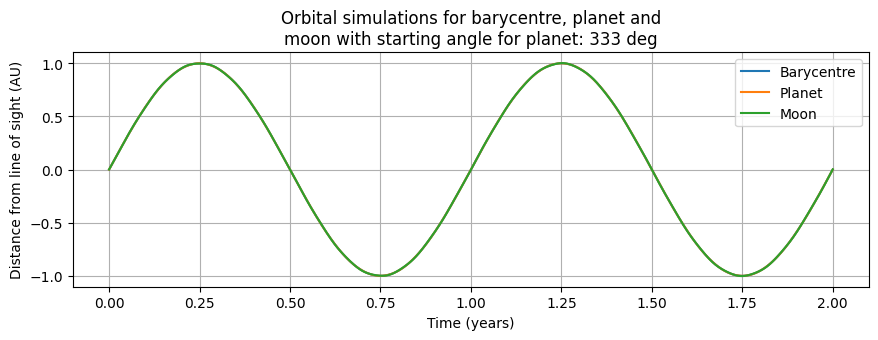

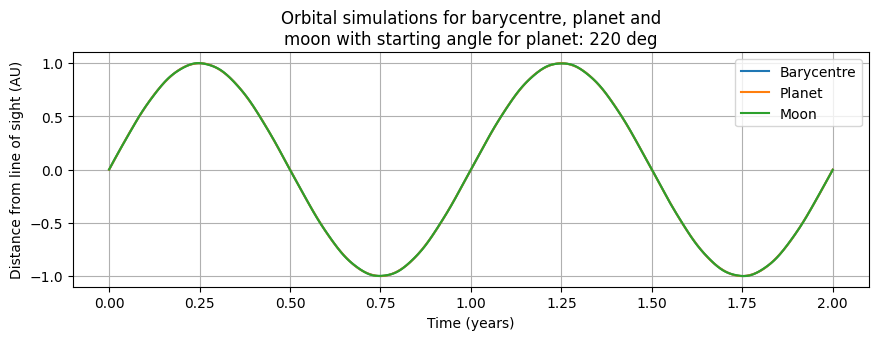

In [92]:
t = np.linspace(0, 2*P, 1000)

N = 2 # N = NUMBER OF ANGLES

angle = []
def position(N):
  for i in range(N):
    angle.append(np.random.uniform(0, 2*np.pi)*u.rad)
    #print(f"Start angle #{i+1} = {angle[i]:.3f}") # IF WE WANT TO PRINT THE LIST OF ALL STARTING ANGLES OF 'N' REALISATIONS

    # BARYCENTRE
    ab = 1*const.au # SEPARATION
    Pb = P.to(u.s)  # PERIOD
    wb = (2*np.pi/Pb) *u.rad # ANGULAR FREQ
    alphab = wb*t
    xb = ab*np.sin(alphab)

    # PLANET
    wp = 2*np.pi/moon_period *u.rad
    alphap = wp*t + angle[i]
    xp = dp * np.sin(alphap) + xb

    # MOON
    wm = 2*np.pi/moon_period *u.rad
    alpham = wm*t + np.pi*u.rad + angle[i]
    xm = dm*np.sin(alpham) + xb

    #'''
    plt.figure(figsize=(17, 6))
    plt.subplot(2, 2, 1)
    plt.plot(t/P, xb/ab.to(u.m), label = f'Barycentre')
    plt.plot(t/P, xp/ab.to(u.m), label = f'Planet')
    plt.plot(t/P, xm/ab.to(u.m), label = f'Moon')
    plt.legend()
    plt.title(f'Orbital simulations for barycentre, planet and\nmoon with starting angle for planet: {alphap[i].to(u.deg):.0f}')
    plt.grid(True)
    plt.xlabel('Time (years)')
    plt.ylabel('Distance from line of sight (AU)')
    plt.tight_layout()

    # TEST TO SEE IF THE ANGLES ARE RANDOMISED
    a = alphap[i]-alpham[i]
    print(f'{a}')
    #'''
  return angle, xb, xp, xm, wb, wp, wm, ab, alphap, alpham


angle, xb, xp, xm, wb, wp, wm, ab, alphap, alpham = position(N)
print('Done')

#TTV calculations
######Using the previous values of angles to calculate the TTVs for moon and planet

The following TTVs are for the 2 random starting angles:
Planet TTV = 156.680 s
Moon TTV = -12738.235 s


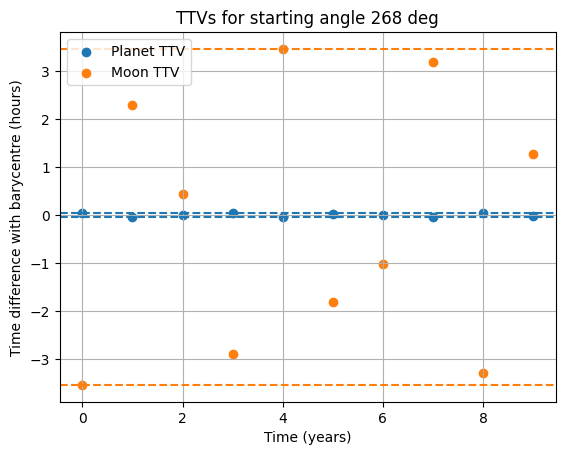

Planet TTV = 156.680 s
Moon TTV = -12738.235 s


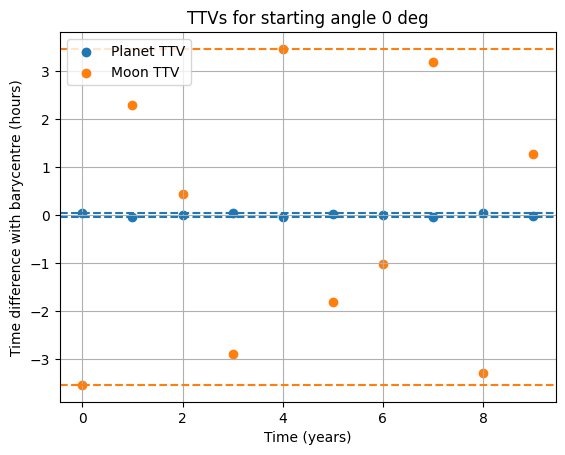

In [115]:
num_of_tran = 10 # NUMBER OF TRANSITS
t = np.arange(0,num_of_tran*P.value,P.value)*P.unit # TIME

#def ttv(transits, angle):
print(f'The following TTVs are for the {N} random starting angles:')
ttvp = []
ttvm = []
for angles in angle:
  # BARYCENTRE
  alphab = wb*t
  xb = ab*np.sin(alphab)
  # PLANET
  wp = 2*np.pi/moon_period *u.rad
  alphap = wp*t + angles # USING THE ANGLE FROM THE PREVIOUS CELL
  xp = dp * np.sin(alphap) + xb
  # MOON
  wm = 2*np.pi/moon_period *u.rad
  alpham = wm*t + np.pi*u.rad + angles
  xm = dm*np.sin(alpham) + xb


  diffp = xb - xp
  diffm = xb - xm

  vb = (2*np.pi*ab)/P.to(u.s) # BARYCENTRE VELOCITY
  #print(f'Velocity of system around star = {vb:.3f}')

  ttvp.append(diffp/vb)
  ttvm.append(diffm/vb)

  print(f'Planet TTV = {ttvp[0][0]:.3f}\nMoon TTV = {ttvm[0][0]:.3f}')

  maxp = np.max(ttvp[0]).to(u.h)
  minp = np.min(ttvp[0]).to(u.h)

  maxm = np.max(ttvm[0]).to(u.h)
  minm = np.min(ttvm[0]).to(u.h)

  plt.scatter(t/P, ttvp[0].to(u.h), label = 'Planet TTV')
  plt.scatter(t/P, ttvm[0].to(u.h), label = 'Moon TTV')

  plt.axhline(y = maxp.value, linestyle = 'dashed', color = 'tab:blue')
  plt.axhline(y = minp.value, linestyle = 'dashed', color = 'tab:blue')
  plt.axhline(y = maxm.value, linestyle = 'dashed', color = 'tab:orange')
  plt.axhline(y = minm.value, linestyle = 'dashed', color = 'tab:orange')

  plt.title(f'TTVs for starting angle {angles.to(u.deg):.0f}')
  plt.xlabel('Time (years)')
  plt.ylabel('Time difference with barycentre (hours)')
  plt.grid()
  plt.legend()
  plt.show()

In [116]:
for i in range(len(ttvp)):
  print(f'TTV list for planets for {i} random starting angles:\n{ttvp[i]}')
  print(f'TTV list for moons for {i} random starting angles:\n{ttvm[i]}\n')

TTV list for planets for 0 random starting angles:
[ 156.68029063 -101.34287445  -19.47356858  127.70787077 -153.42835889
   80.01667135   45.09488952 -141.07002124  145.89786944  -56.45909493] s
TTV list for moons for 0 random starting angles:
[-12738.23501065   8239.25808552   1583.21695792 -10382.75372114
  12473.85031612  -6505.42043472  -3666.25118077  11469.10741756
 -11861.61540183   4590.17031941] s

TTV list for planets for 1 random starting angles:
[  -1.04296361 -114.7102339   156.34756953  -96.96658729  -25.06584239
  130.90288611 -152.16177234   75.10684193   50.47565341 -143.44513394] s
TTV list for moons for 1 random starting angles:
[    84.79378927   9326.03527667 -12711.18451424   7883.46238151
   2037.87336523 -10642.51106555  12370.87580008  -6106.2473112
  -4103.71165935  11662.20601138] s

